# Iteration test
This file demonstrates how to initialize an Equilibrium object from leading order quantities and tests its accuracy.

In [12]:
# This file implements and tests recursion relations
import numpy as np
import timeit
import scipy.signal
from matplotlib import pyplot as plt
from numba import jit, njit, prange
from numba import complex128, int64    # import jit value types

# for importing parsed codes
import sys
import cProfile
sys.path.insert(1,'/Users/lanke/Desktop/Second year project/Code/python_source/MHD_parsed/')
sys.path.insert(1,'/Users/lanke/Desktop/Second year project/Code/python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
from equilibrium import *


import MHD_parsed
debug_path = '/Users/lanke/Desktop/Second year project/Code/test_data_eduardo/'

Axis shape:


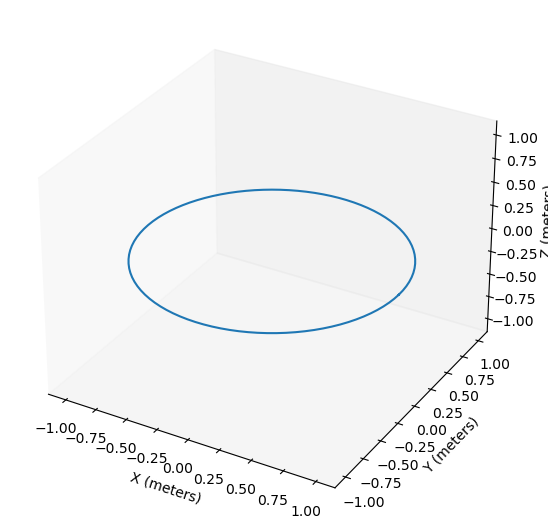

In [13]:
# No B theta
B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )

In [14]:
print(B_psi_coef_cp.get_order())
print(B_theta_coef_cp.get_order())
print(Delta_coef_cp.get_order())
print(p_perp_coef_cp.get_order())
print(X_coef_cp.get_order())
print(Y_coef_cp.get_order())
print(Z_coef_cp.get_order())

1
2
2
2
3
3
3


In [15]:
B_psi_coef_cp[1]

## Initializing an `Equilibrium`
### Required quantities and orders
Unknowns:

1. X_coef_cp: 2
2. Y_coef_cp: 2
3. Z_coef_cp: 2
4. B_psi_coef_cp: 0
5. B_theta_coef_cp: 2
6. iota_coef: 0
7. Delta_coef_cp: 3
8. p_perp_coef_cp: 3

Known constants:
1. B_denom_coef_c: 2
2. B_alpha_coef: 1
3. kap_p
4. dl_p 
5. tau_p
6. eta

In [16]:
B_alpha_coef.get_order()

1

In [17]:
equilibrium = Equilibrium.from_known(
    X_coef_cp=X_coef_cp.mask(2),
    Y_coef_cp=Y_coef_cp.mask(2),
    Z_coef_cp=Z_coef_cp.mask(2),
    B_psi_coef_cp=B_psi_coef_cp.mask(0),
    B_theta_coef_cp=B_theta_coef_cp.mask(2),
    B_denom_coef_c=B_denom_coef_c.mask(2),
    B_alpha_coef=B_alpha_coef.mask(1),
    iota_coef=iota_coef.mask(0), 
    kap_p=kap_p, 
    dl_p=dl_p, 
    tau_p=tau_p,
    eta=eta,
    p_perp_coef_cp = p_perp_coef_cp.mask(2), 
    Delta_coef_cp = Delta_coef_cp.mask(2))
equilibrium.get_order()

integral_mode is fft


2

## Iterate 2 orders using only the magentic equations

In [18]:
equilibrium.iterate_2(
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
    iota_new=iota_coef[1],
    loop_max_freq=(20, 20)
)
equilibrium.iterate_2(
    B_alpha_nb2=0,
    B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
    iota_new=iota_coef[1],
    loop_max_freq=(70, 90)
)
print('Done')

Evaluating order 3 4
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
Time elapsed(s): 4.637706995010376
Evaluating order 5 6
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
Time elapsed(s): 10.595305919647217
Done


## Accessing data and checking accuracy

X_coef_cp n = 3


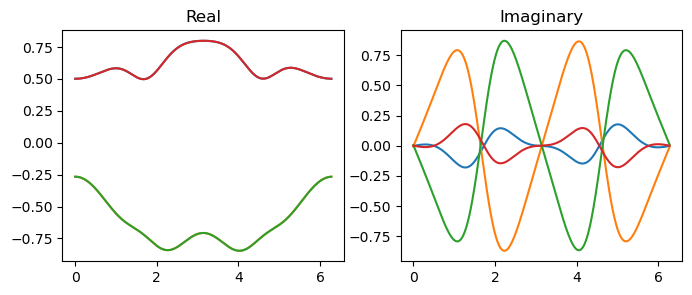

Y_coef_cp n = 3


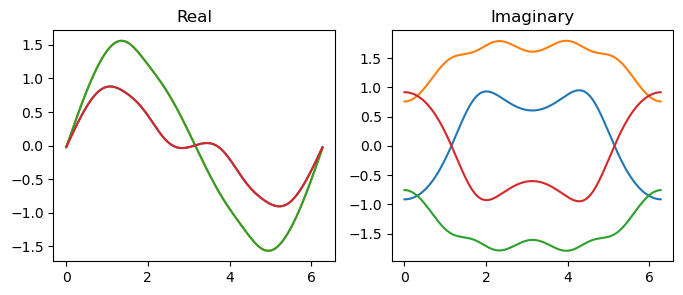

Z_coef_cp n = 3


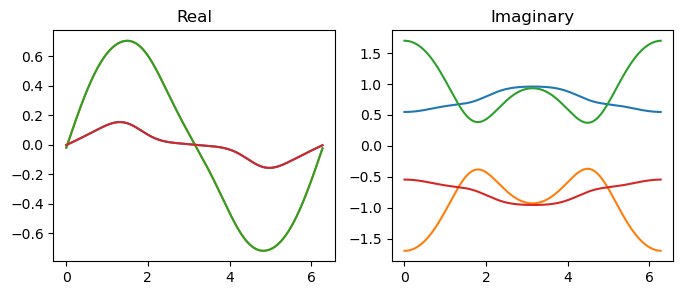

B_psi_coef_cp n = 1


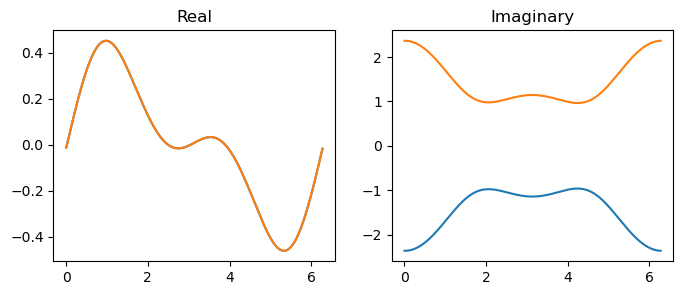

B_theta_coef_cp n = 3


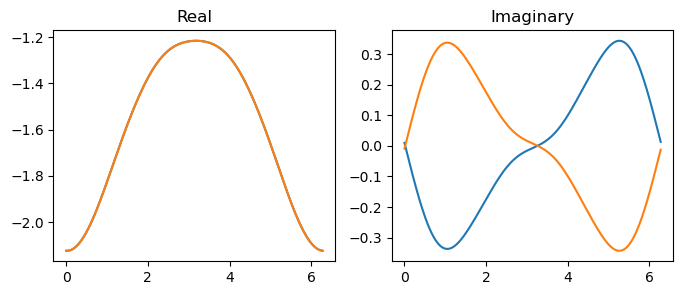

iota_coef n = 3
p_perp_coef_cp n = 3


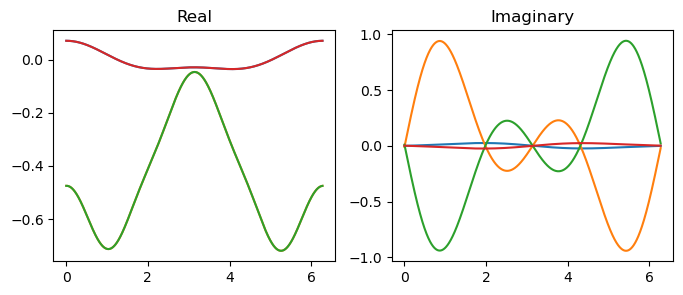

Delta_coef_cp n = 3


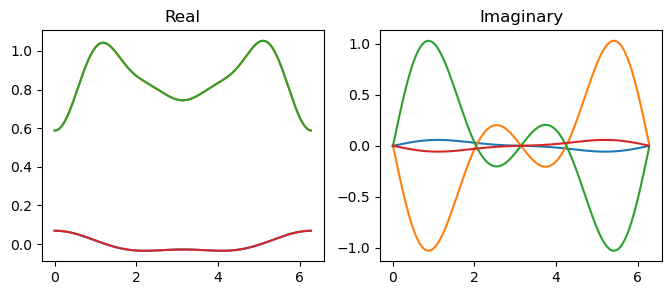

In [19]:
equilibrium.display_order(3)

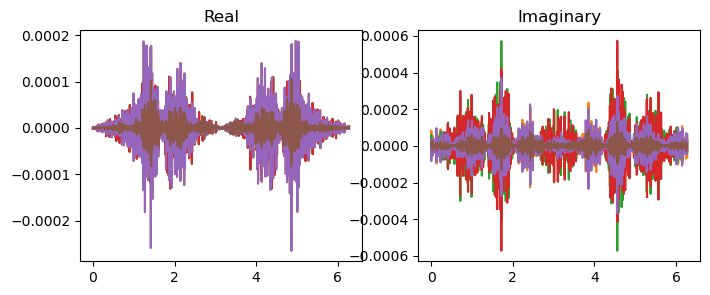

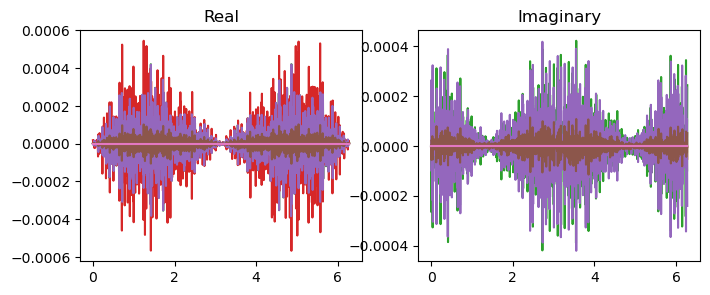

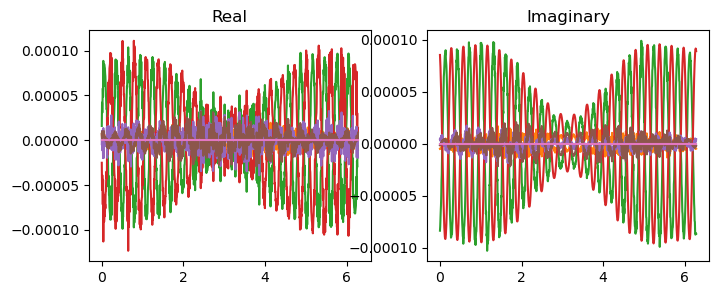

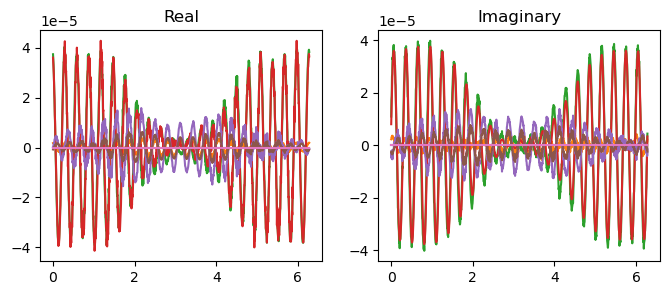

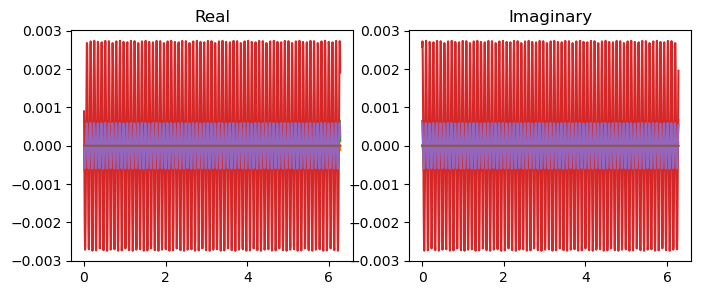

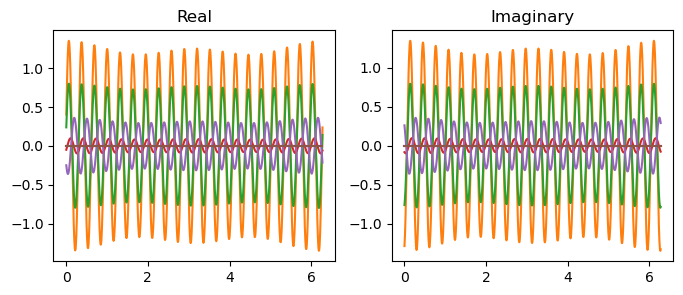

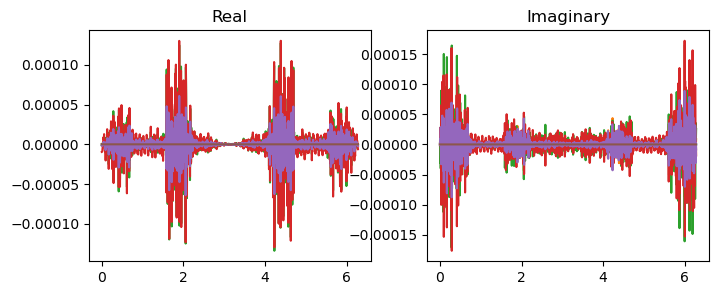

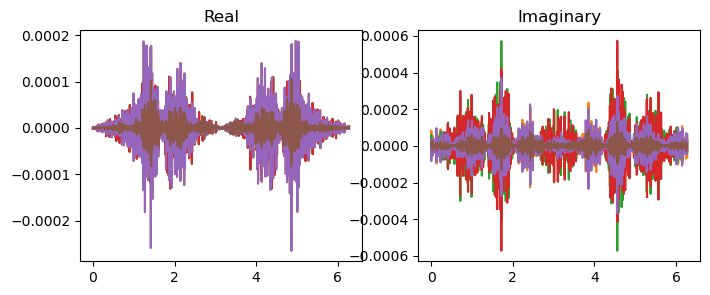

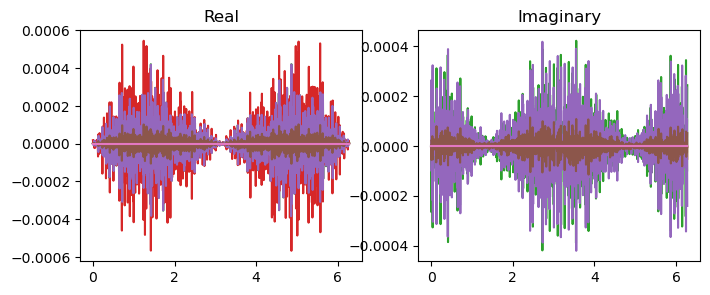

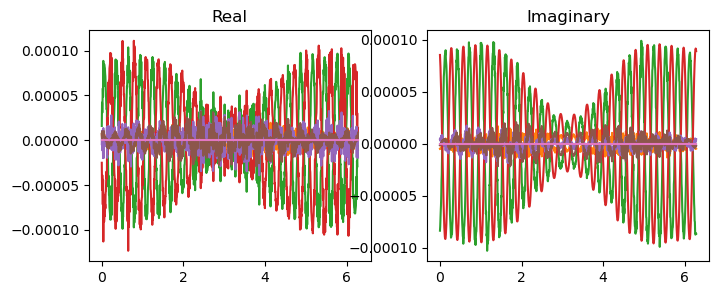

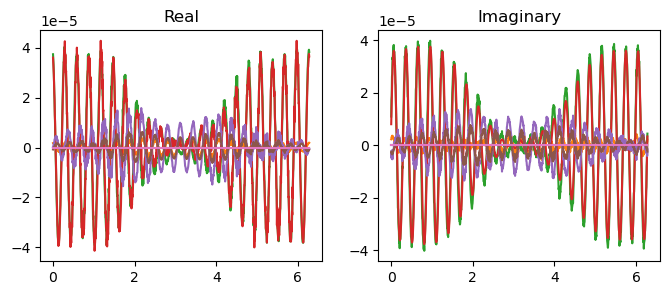

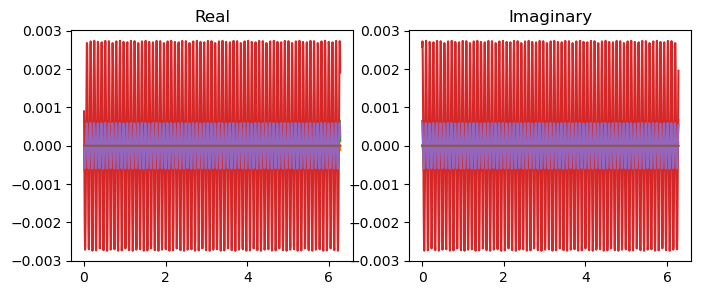

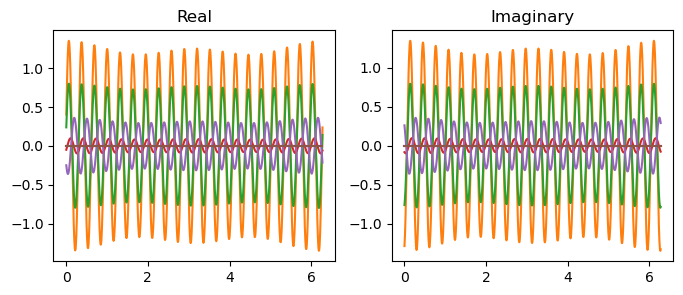

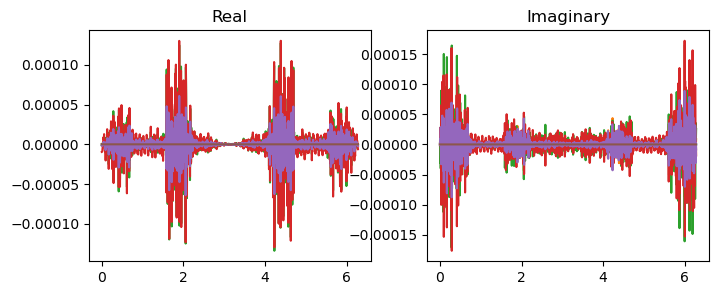

In [21]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium.check_governing_equations(5)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()
